**CNN on CIFAIR10 dataset**

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [2]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
print(x_train[50])

[[[ 16  76  74]
  [ 17  77  75]
  [ 17  77  75]
  ...
  [ 62 106  87]
  [ 55  99  80]
  [ 51  94  75]]

 [[ 16  76  74]
  [ 16  76  74]
  [ 15  75  74]
  ...
  [ 62 109  84]
  [ 58 105  80]
  [ 52 100  75]]

 [[ 16  76  74]
  [ 15  75  73]
  [ 15  75  73]
  ...
  [ 57 110  79]
  [ 59 111  80]
  [ 56 109  78]]

 ...

 [[ 96 110 138]
  [114 127 159]
  [119 132 167]
  ...
  [128 135 153]
  [120 130 145]
  [117 131 142]]

 [[118 132 159]
  [100 113 145]
  [114 126 163]
  ...
  [139 146 159]
  [131 140 153]
  [121 134 147]]

 [[144 148 173]
  [136 140 168]
  [105 114 143]
  ...
  [145 151 170]
  [137 144 163]
  [131 141 158]]]


In [5]:
#Normalization between 0 to 1
x_train,x_test=x_train/255.0,x_test/255.0

In [6]:
print(x_train[50])

[[[0.0627451  0.29803922 0.29019608]
  [0.06666667 0.30196078 0.29411765]
  [0.06666667 0.30196078 0.29411765]
  ...
  [0.24313725 0.41568627 0.34117647]
  [0.21568627 0.38823529 0.31372549]
  [0.2        0.36862745 0.29411765]]

 [[0.0627451  0.29803922 0.29019608]
  [0.0627451  0.29803922 0.29019608]
  [0.05882353 0.29411765 0.29019608]
  ...
  [0.24313725 0.42745098 0.32941176]
  [0.22745098 0.41176471 0.31372549]
  [0.20392157 0.39215686 0.29411765]]

 [[0.0627451  0.29803922 0.29019608]
  [0.05882353 0.29411765 0.28627451]
  [0.05882353 0.29411765 0.28627451]
  ...
  [0.22352941 0.43137255 0.30980392]
  [0.23137255 0.43529412 0.31372549]
  [0.21960784 0.42745098 0.30588235]]

 ...

 [[0.37647059 0.43137255 0.54117647]
  [0.44705882 0.49803922 0.62352941]
  [0.46666667 0.51764706 0.65490196]
  ...
  [0.50196078 0.52941176 0.6       ]
  [0.47058824 0.50980392 0.56862745]
  [0.45882353 0.51372549 0.55686275]]

 [[0.4627451  0.51764706 0.62352941]
  [0.39215686 0.44313725 0.56862745]


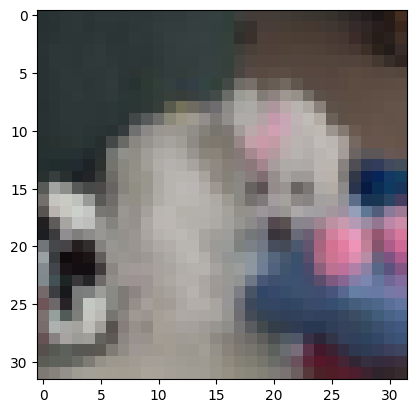

In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(x_train[27150])
plt.show()

In [8]:
from tensorflow.keras import utils
y_train=utils.to_categorical(y_train,10)
y_test=utils.to_categorical(y_test,10)

In [9]:
print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [10]:
#Build CNN model
model=Sequential(
    [
        Dense(64,input_shape=(32,32,3)),
        Conv2D(64,kernel_size=(3,3),activation='relu'),
        Conv2D(64,kernel_size=(3,3),activation='relu'),
        MaxPool2D(pool_size=(2,2)),
        Conv2D(128,kernel_size=(3,3),activation='relu'),
        Conv2D(128,kernel_size=(3,3),activation='relu'),
        MaxPool2D(pool_size=(2,2)),
        Dropout(0.3),
        Flatten(),
        Dense(128,activation='relu'),
        Dense(10,activation='softmax')
    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='sgd')

In [12]:
train=model.fit(x_train,y_train,batch_size=32,verbose=1,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.1933 - loss: 2.1634 - val_accuracy: 0.3829 - val_loss: 1.7226
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.3884 - loss: 1.6992 - val_accuracy: 0.4477 - val_loss: 1.5583
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.4655 - loss: 1.4757 - val_accuracy: 0.4961 - val_loss: 1.4084
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5169 - loss: 1.3458 - val_accuracy: 0.5567 - val_loss: 1.2380
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5633 - loss: 1.2221 - val_accuracy: 0.5897 - val_loss: 1.1610
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.6020 - loss: 1.1310 - val_accuracy: 0.6253 - val_loss: 1.0713
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6344 - loss: 1.0454 - val_accuracy: 0.6419 - val_loss: 1.0180
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6629 - loss: 

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32, 32, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 706,572 (2.70 MB)

 Trainable params: 706,570 (2.70 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [14]:
val_loss,val_acc=model.evaluate(x_test,y_test)
print(val_loss)
print(val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6748 - loss: 0.9188
0.9309432506561279
0.6730999946594238


In [15]:
#make predictions
arr=model.predict([x_train[12150].reshape(1,32,32,3)])
print(arr)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(1, 32, 32, 3))',)
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step
[[7.2938215e-05 5.0244576e-01 8.3616338e-05 1.7537395e-04 1.3058980e-05
  1.4334614e-03 2.9054461e-05 2.7053260e-05 1.3061739e-04 4.9558911e-01]]


In [16]:
label=np.argmax(arr)
print(label)

1
